__Exercise 3__

In [173]:
import pandas as pd
import bz2
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
searches = '/home/dsc/Data/challenge/searches.csv.bz2'

In [ ]:
searches_sample = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2',
                       compression = 'bz2', sep = '^')

In [176]:
searches_sample.shape

(10000, 45)

In [177]:
searches_sample.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

As we are looking for monthly plot, we need to filter the month from the Date column. Note that it is given in format (yyy-mm-dd).

Also we need the Destination column, specifically BCN, MAD, AGP

In [112]:
df = searches_sample[['Date', 'Destination']].copy()
df = df[df['Destination'].isin(['MAD', 'BCN', 'AGP'])].copy()

df.head(10)

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN
147,2013-01-01,AGP
151,2013-01-01,MAD
165,2013-01-01,BCN
177,2013-01-01,BCN
186,2013-01-01,BCN
188,2013-01-01,BCN
208,2013-01-01,BCN


In [113]:
df.shape


(335, 2)

In [117]:
df['Date_added'] = pd.to_datetime(df['Date'])
df['month'] = df['Date_added'].dt.month
df['year'] = df['Date_added'].dt.year

df

,Date,Destination,Date_added,month,year
4,2013-01-01,MAD,2013-01-01,1,2013
93,2013-01-01,AGP,2013-01-01,1,2013
113,2013-01-01,BCN,2013-01-01,1,2013
147,2013-01-01,AGP,2013-01-01,1,2013
151,2013-01-01,MAD,2013-01-01,1,2013
...,...,...,...,...,...
9830,2013-01-10,AGP,2013-01-10,1,2013
9881,2013-01-10,BCN,2013-01-10,1,2013
9906,2013-01-10,MAD,2013-01-10,1,2013
9947,2013-01-10,MAD,2013-01-10,1,2013


In [156]:
df.columns

Index(['Date', 'Destination', 'Date_added', 'month', 'year'], dtype='object')

In [136]:
df_aux = pd.get_dummies(df['Destination'])
df_aux.head()

,AGP,BCN,MAD
4,0,0,1
93,1,0,0
113,0,1,0
147,1,0,0
151,0,0,1


In [142]:
df_new = df.join(df_aux)
df_new_plot = df_new[['Date','AGP', 'BCN', 'MAD']].copy()
df_new_plot['Date'] = pd.DatetimeIndex(df_new_plot.Date).to_period("M")
df_new_plot

,Date,AGP,BCN,MAD
4,2013-01,0,0,1
93,2013-01,1,0,0
113,2013-01,0,1,0
147,2013-01,1,0,0
151,2013-01,0,0,1
...,...,...,...,...
9830,2013-01,1,0,0
9881,2013-01,0,1,0
9906,2013-01,0,0,1
9947,2013-01,0,0,1


In [143]:
df_save = df_new_plot.groupby('Date').agg(['sum'])

In [144]:
df_save

,AGP,BCN,MAD
,sum,sum,sum
Date,,,
2013-01,48,162,125


Total searches for AGP over the year are = 0
Total searches for MAD over the year are = 0
Total searches for BCN over the year are = 0


/home/dsc/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


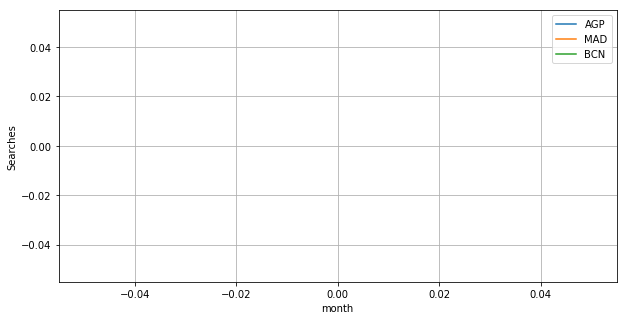

In [172]:
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
vDSTN = ['AGP','MAD','BCN']
for x in vDSTN:
    survey = df[df['Destination'] == x]
    df2 = survey.groupby(['month']).count()
    df2 = df2.reset_index(level=['month'])
    print("Total searches for %s over the year are = %s"%(x,df2['Destination'].sum()))
    df2.plot(x = 'month', y = 'Destination', label = x, ax = ax)
ax.set_ylabel('Searches')
plt.grid('on')

